In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn.model_selection
import statsmodels
import statsmodels.formula.api as sm
import statsmodels.stats.proportion

# Confidence Interval Basics

In [2]:
# From PTSD paper, there were 52 test cases, 42 of which were correct

n = 52
c = 42

# Create array of zeros, size n
rawdata = np.zeros(n)

# Set first c elements to 1
rawdata[range(c)] = 1

# Create pandas data frame
data = pd.DataFrame({"Match": rawdata})

In [3]:
# Compute 10000 bootstrap datasets, compute means in each

def createBootstrapMeans(data):
    numboot = 10000
    n = len(data)
    boot_means = np.zeros(numboot)
    np.random.seed(0)
    for i in range(numboot):
        d = data.sample(n, replace=True)
        boot_means[i] = d.mean()
    return boot_means

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


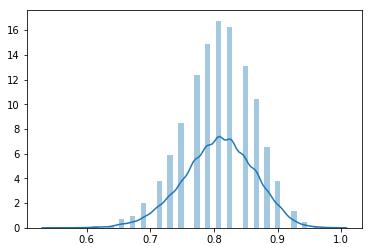

In [4]:
# Plot histogram
bm = createBootstrapMeans(data)
sns.distplot(bm)

In [5]:
# Compute confidence interval

boot_ci = np.quantile(bm, [0.025, 0.975])
print(boot_ci)

[0.69230769 0.90384615]


In [6]:
## Using central limit theorem, compute confidence interval

stderr = np.std(data.Match,ddof=1)/np.sqrt(len(data.Match))
print(f"Stderr: {stderr}")

# Area under a standard normal from -1.96 to 1.96 is about 95%
critval = 1.96
print(f"Critical value: {critval}")

norm_ci = [data.Match.mean() - critval*stderr, 
           data.Match.mean() + critval*stderr]

print(f"Boot ci: {boot_ci}")
print(f"Norm ci: {norm_ci}")

Stderr: 0.05518692722918766
Critical value: 1.96
Boot ci: [0.69230769 0.90384615]
Norm ci: [0.6995259303230998, 0.9158586850615156]


In [7]:
# Using t-distribution
# Degrees of freedom of t distribution for this method is n-1

my_df = len(data.Match) - 1

# The ppf function is the inverse of the CDF. Given a probability p,
# it tells us the x for which CDF(x) = p

critval = scipy.stats.t.ppf(0.975, df=my_df)
print(f"Critical value: {critval}")

t_ci = [data.Match.mean() - critval*stderr, 
        data.Match.mean() + critval*stderr]

print(f"Boot ci: {boot_ci}")
print(f"Norm ci: {norm_ci}")
print(f"   t ci: {t_ci}")

Critical value: 2.007583768155882
Boot ci: [0.69230769 0.90384615]
Norm ci: [0.6995259303230998, 0.9158586850615156]
   t ci: [0.6968999283725907, 0.9184846870120247]


In [8]:
# Easy approximate confidence intervals
model = sm.ols('Match ~ 1', data = data).fit()

display(model.summary())

print(f"Boot ci: {boot_ci}")
print(f"Norm ci: {norm_ci}")
print(f"   t ci: {t_ci}")
print(f"{c} {n}")

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Match   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 12 Feb 2020   Prob (F-statistic):                nan
Time:                        13:19:14   Log-Likelihood:                -25.367
No. Observations:                  52   AIC:                             52.73
Df Residuals:                      51   BIC:                             54.68
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8077      0.055     14.636      0.000       0.697       0.918
==============================================================================
Omnibus:                       17.148   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.546
Skew:                          -1.561   Prob(JB):                     2.10e-05
Kurtosis:                       3.438   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Boot ci: [0.69230769 0.90384615]
Norm ci: [0.6995259303230998, 0.9158586850615156]
   t ci: [0.6968999283725907, 0.9184846870120247]
42 52


# Prediction bootstrap 

In [9]:
# Data: 1000 births from North Carolina
# https://www.openintro.org/stat/data/?data=nc

births = pd.read_csv("nc.csv")
display(births)

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
5,NaN,15,younger mom,38.0,full term,19.0,married,22.0,5.38,low,male,nonsmoker,not white
6,18.0,15,younger mom,37.0,full term,12.0,married,76.0,8.44,not low,male,nonsmoker,not white
7,17.0,15,younger mom,35.0,premie,5.0,married,15.0,4.69,low,male,nonsmoker,not white
8,NaN,16,younger mom,38.0,full term,9.0,married,NaN,8.81,not low,male,nonsmoker,white
9,20.0,16,younger mom,37.0,full term,13.0,married,52.0,6.94,not low,female,nonsmoker,white


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


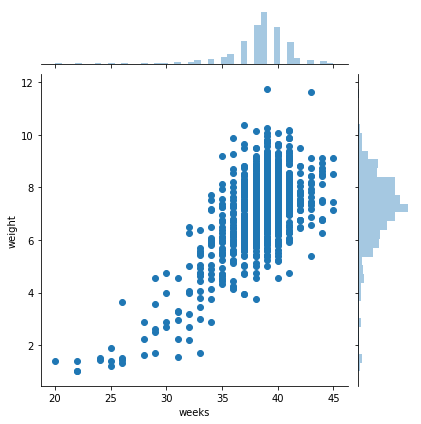

In [10]:
# Make a Joint plot between weeks and weight
sns.jointplot(data=births,x='weeks',y='weight')

In [11]:
# Split the data using the sample size we decide on
(train, test) = sklearn.model_selection.train_test_split(births, test_size=500)

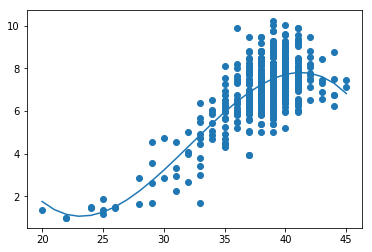

In [12]:
# Train a model on the training set and plot the fit 
train_model = sm.ols("weight ~ weeks + I(weeks**2) + I(weeks**3)", data=train).fit()
plt.scatter(train.weeks,train.weight)
T = pd.DataFrame({'weeks':np.arange(20,46)})
T['weight']=train_model.predict(exog=T)
plt.plot(T.weeks,T.weight)

In [13]:
# Write a Bootstrap function that records the fitted models 
def BootstrapFit(data):
    numboot = 1000
    n = len(data)
    bsFit = [None]*numboot    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        bsFit[i] = sm.ols("weight ~ weeks + I(weeks**2) + I(weeks**3)", data=d).fit()
    return bsFit

In [14]:
# Get 1000 Bootstrap fits
bsFit = BootstrapFit(train)

In [15]:
#  Extract the parameters for the 1000 Boostrap fits.
#  Also generate the predictions for the 1000 Bootstrap fits 
YP = np.zeros((len(bsFit),len(T.weeks)))
theta = np.zeros((len(bsFit),4))
for i in range(len(bsFit)):
    YP[i,:]=bsFit[i].predict(exog=T)
    theta[i,:]=bsFit[i].params.values

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


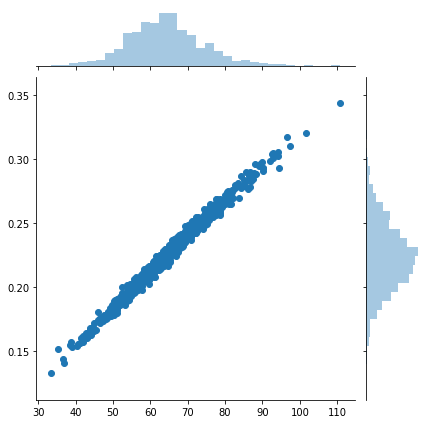

In [16]:
# Make a joint plot of two parameters 
sns.jointplot(x=theta[:,0],y=theta[:,2])

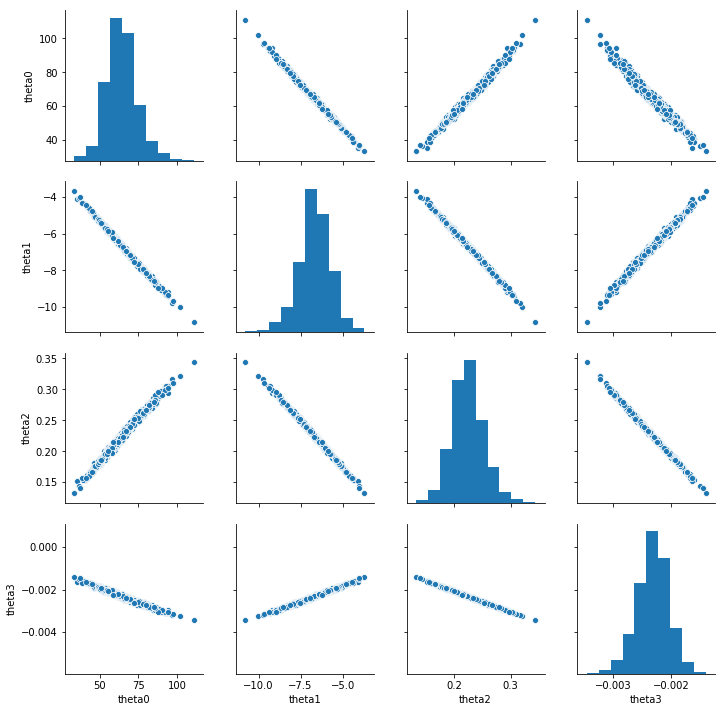

In [17]:
# Make a data frame from the parameter estimates 
B=pd.DataFrame({'theta0':theta[:,0],'theta1':theta[:,1],'theta2':theta[:,2],'theta3':theta[:,3],})
# Produce a pair plot of all co-dependencies 
sns.pairplot(B)

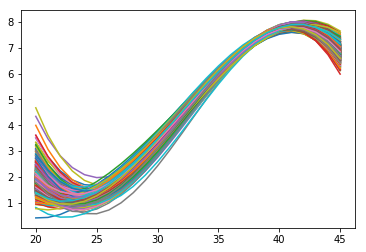

In [18]:
# Plot 20 of the bootstrapped predictions 
for i in range(1000):
    plt.plot(T.weeks,YP[i,:])

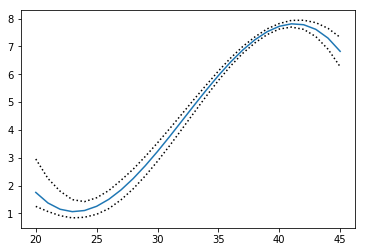

In [19]:
# Caluculate upper and lower confidence bounds for prediction 
# From Bootstrapped means 
upper=np.quantile(YP,0.975,axis=0)
lower=np.quantile(YP,0.025,axis=0)
plt.plot(T.weeks,T.weight)
plt.plot(T.weeks,lower,'k:')
plt.plot(T.weeks,upper,'k:')